# Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.exceptions import FitFailedWarning


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam


2025-04-27 12:25:50.787705: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745756751.052017      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745756751.128686      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df=pd.read_csv(r'/kaggle/input/bank-transaction/Bank_Transaction_Fraud_Detection.csv')

In [3]:
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [5]:
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


In [6]:
df.isnull().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [7]:
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')

In [8]:
df=df.drop(['Customer_ID', 'Customer_Name','Merchant_ID','Transaction_ID','Customer_Contact','Customer_Email'],axis=1)

# Exploratory Data Analysis (EDA)

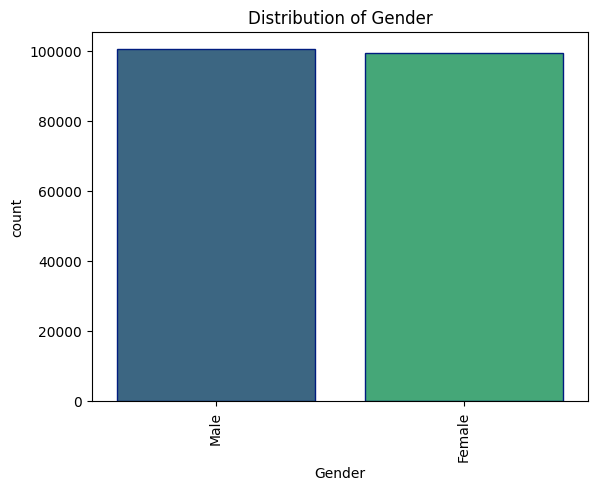

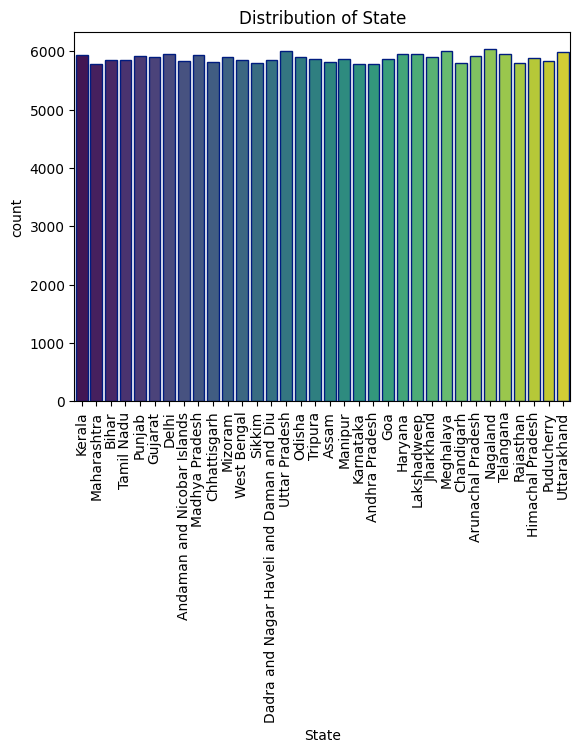

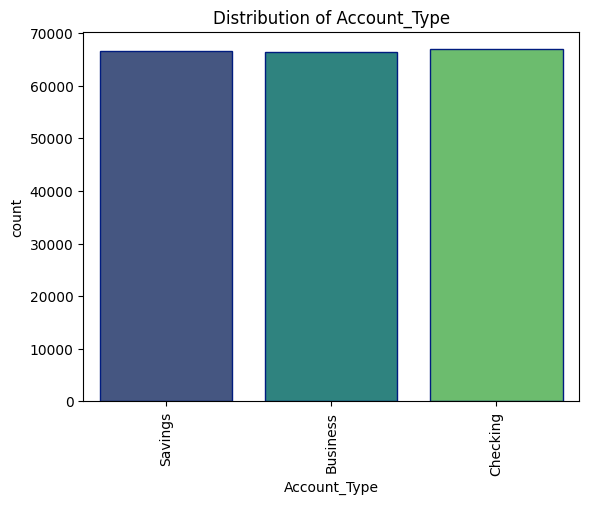

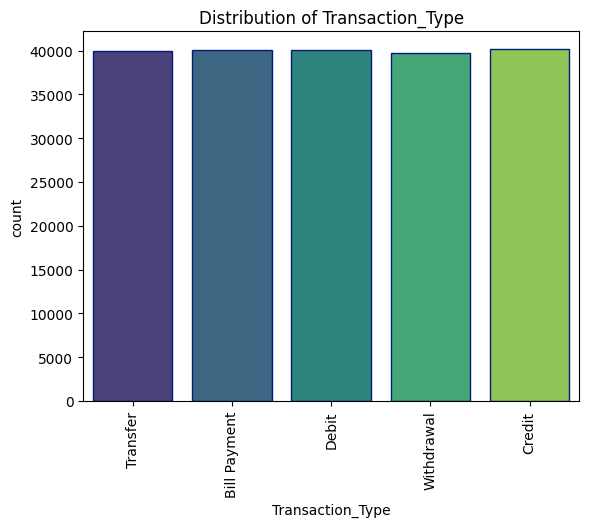

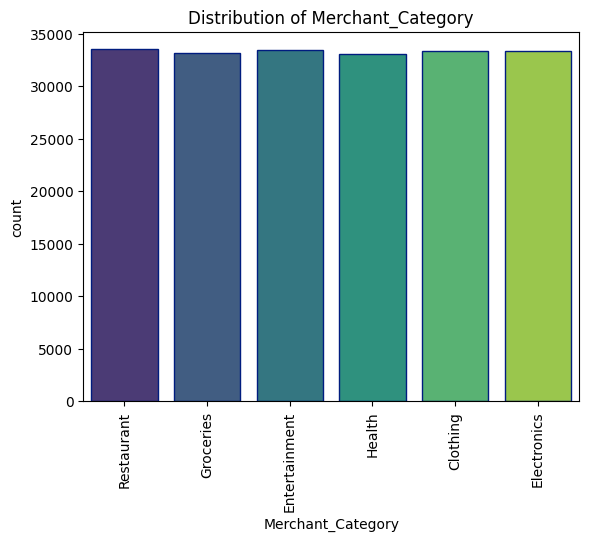

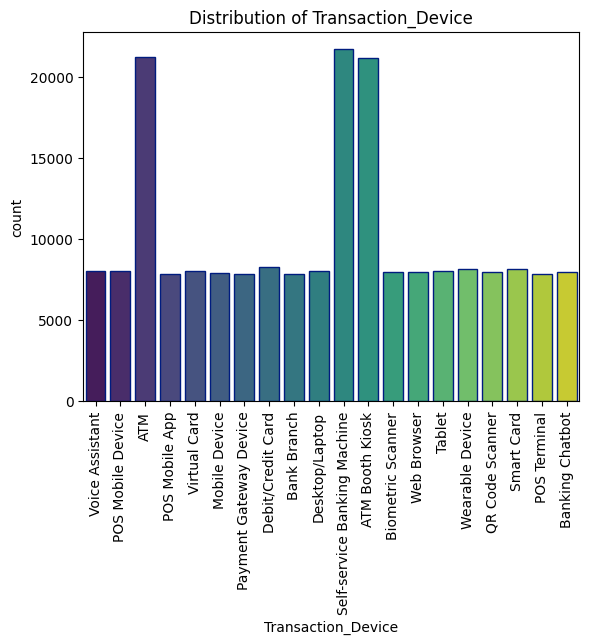

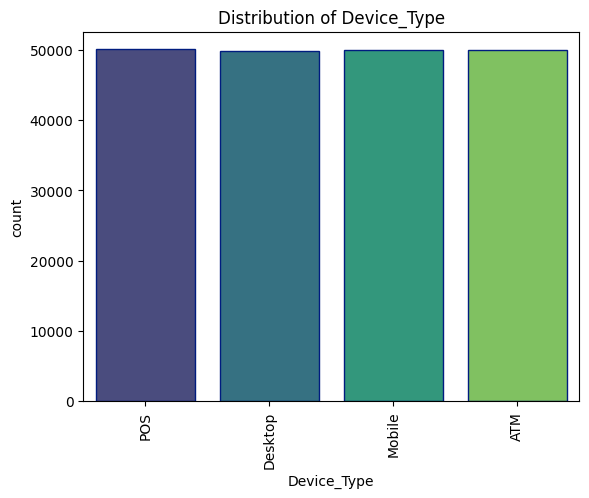

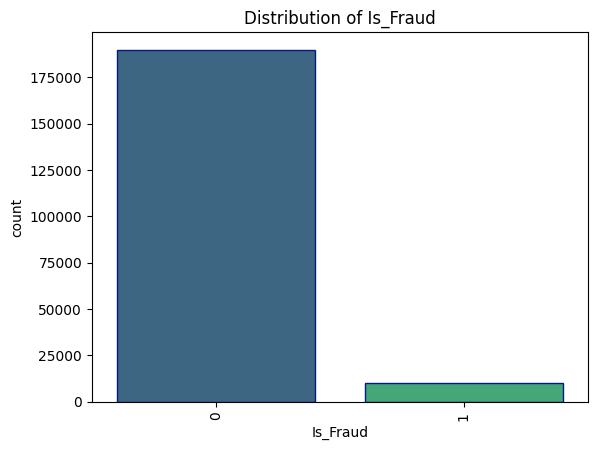

In [9]:
categorical_col=['Gender','State', 'Account_Type', 'Transaction_Type', 'Merchant_Category',   'Transaction_Device', 'Device_Type', 'Is_Fraud']
for col in categorical_col:
  sns.countplot(x=col,data=df,palette="viridis",edgecolor=sns.color_palette("dark",n_colors=1))
  plt.xticks(rotation=90)
  plt.title(f'Distribution of {col}')
  plt.show()

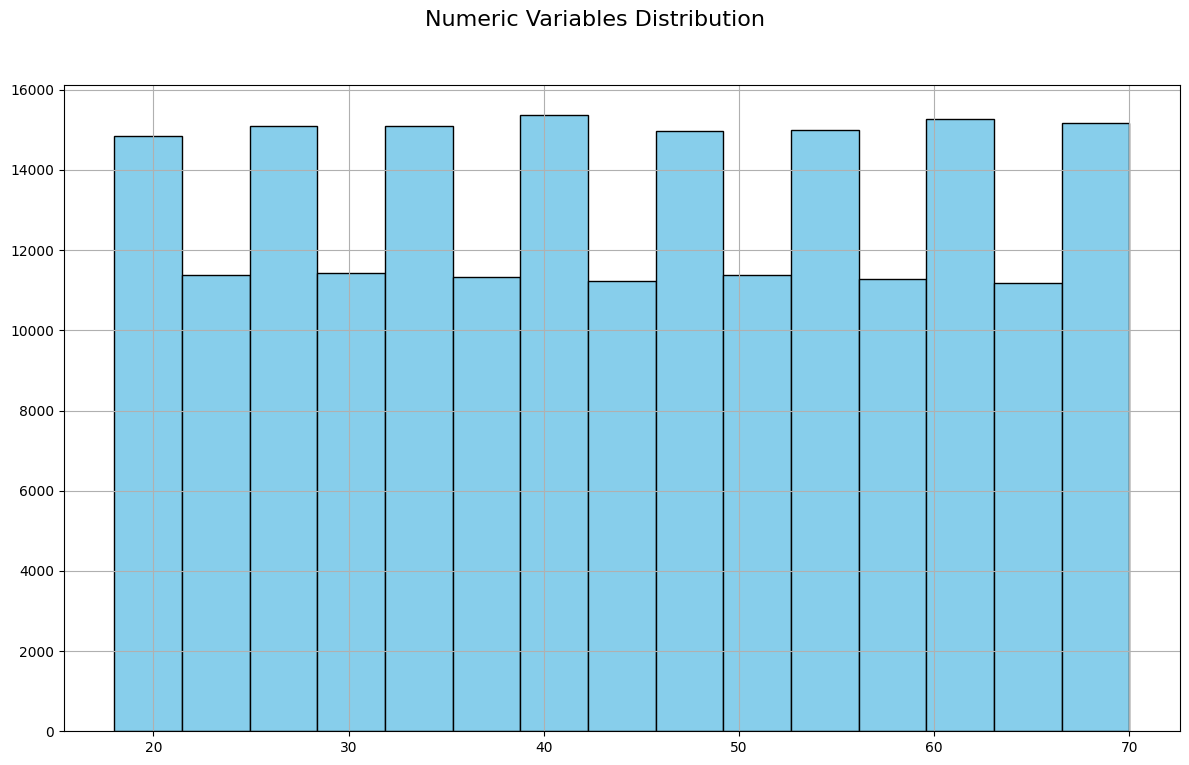

In [10]:
df['Age'].hist(figsize=(12, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Numeric Variables Distribution", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

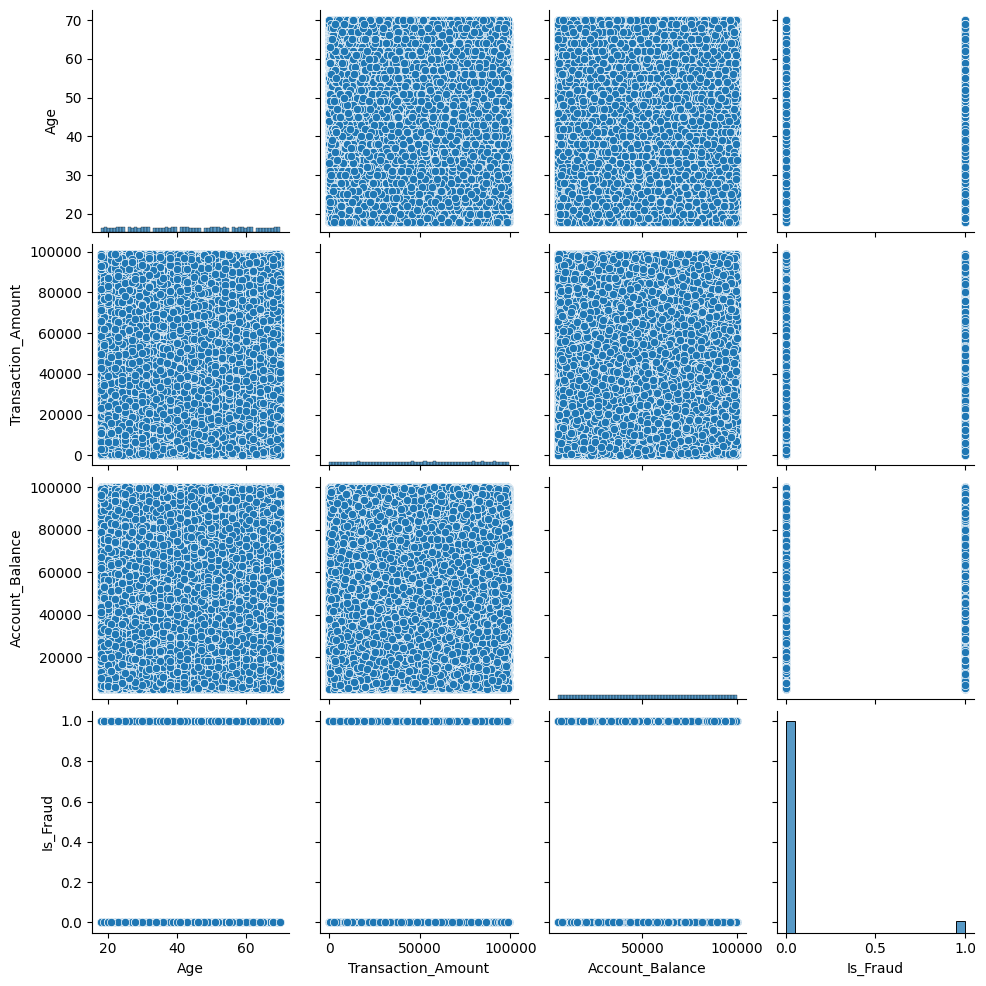

In [11]:
sns.pairplot(data=df)
plt.show()

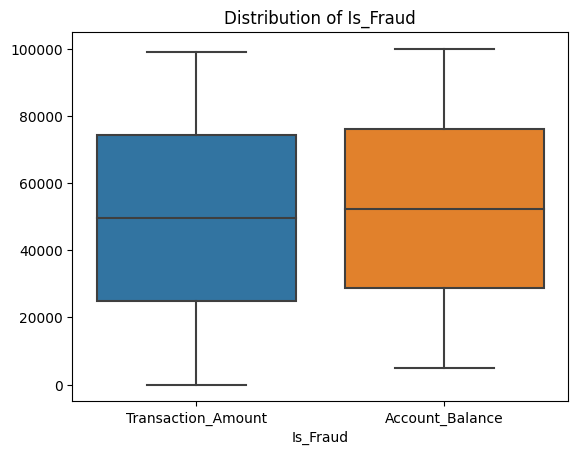

In [12]:
numeric_col=['Transaction_Amount','Account_Balance']
sns.boxplot(data=df[numeric_col])
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.show()

# Exploratory Data Analysis (EDA) - Correlational Analysis

<Axes: >

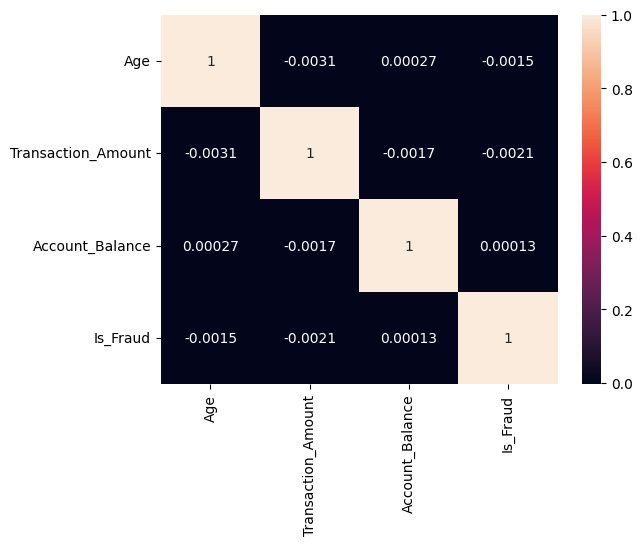

In [13]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Preprocessing

In [14]:
le=LabelEncoder()

In [15]:
categorical_col_1=['Gender','State', 'Account_Type', 'Transaction_Currency', 'Transaction_Description', 'Transaction_Location','Transaction_Type', 'City', 'Bank_Branch','Merchant_Category',   'Transaction_Device', 'Device_Type', 'Is_Fraud']
for col in categorical_col_1:
  df[col]=le.fit_transform(df[col])

In [16]:
df

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Transaction_Description
0,1,60,15,127,127,2,23-01-2025,16:04:07,32415.45,3,5,74557.27,17,129,3,0,0,9
1,0,51,18,100,100,0,11-01-2025,17:14:53,43622.60,0,5,74622.66,9,102,1,0,0,65
2,1,20,4,13,13,2,25-01-2025,03:09:52,63062.56,0,3,66817.99,0,13,1,0,0,102
3,0,57,28,22,22,0,19-01-2025,12:27:02,14000.72,2,2,58177.08,8,24,2,0,0,51
4,0,43,25,7,7,2,30-01-2025,18:30:46,18335.16,3,2,16108.56,16,7,2,0,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,55,7,33,33,0,08-01-2025,18:42:09,98513.74,1,5,37475.11,6,35,0,0,0,0
199996,1,51,19,63,63,0,01-01-2025,20:51:21,40593.55,4,3,53037.20,0,65,0,0,0,145
199997,0,41,5,21,21,2,28-01-2025,10:47:40,61579.70,4,4,96225.36,0,21,1,0,0,21
199998,0,28,29,103,103,1,08-01-2025,06:26:41,39488.22,2,1,89599.90,17,105,1,0,0,156


# Categorical Values after encoding

In [17]:
df.columns

Index(['Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type',
       'Transaction_Date', 'Transaction_Time', 'Transaction_Amount',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Transaction_Description'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Is_Fraud')

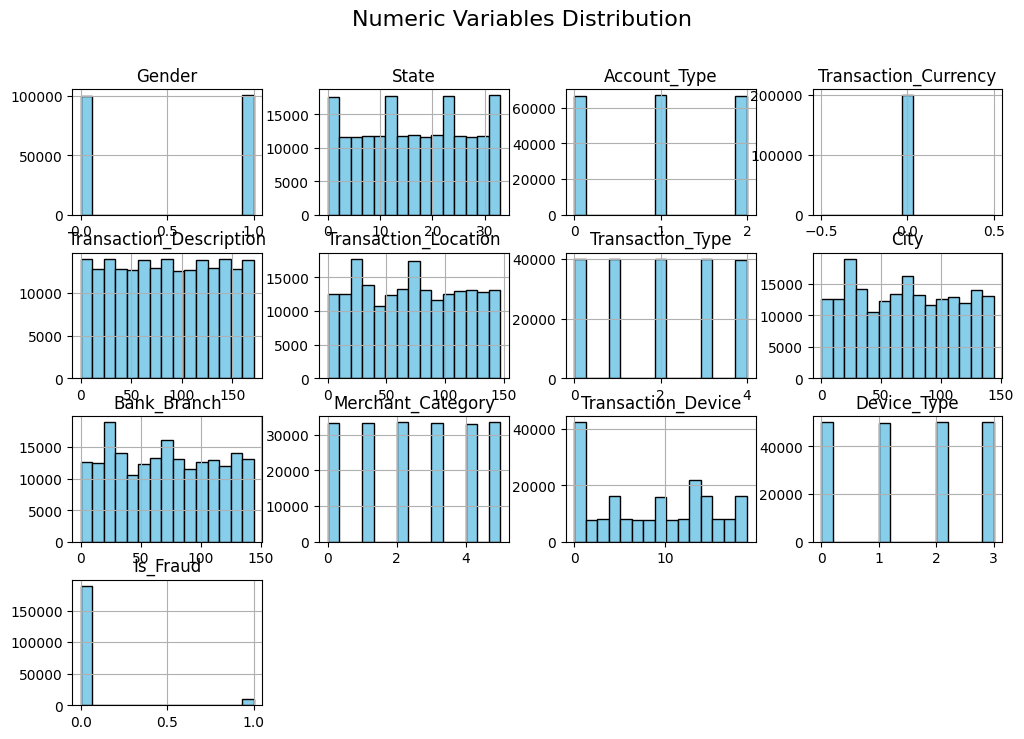

In [18]:
df[categorical_col_1].hist(figsize=(12, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Numeric Variables Distribution", fontsize=16)
plt.xticks(rotation=90)
plt.title(f'Distribution of {col}')

In [19]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='%d-%m-%Y')
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S')


In [20]:
df['Transaction_Day'] = df['Transaction_Date'].dt.day
df['Transaction_Month'] = df['Transaction_Date'].dt.month
df['Transaction_Year'] = df['Transaction_Date'].dt.year
df['Transaction_Hour'] = df['Transaction_Time'].dt.hour
df['Transaction_Minute'] = df['Transaction_Time'].dt.minute
df['Transaction_Second'] = df['Transaction_Time'].dt.second

In [21]:
df = df.drop(columns=['Transaction_Date', 'Transaction_Time'])

In [22]:
X=df.drop('Is_Fraud',axis=1)
y=df['Is_Fraud']

# Train and Test the split data

In [23]:
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)

In [25]:
rf.fit(X,y)

RandomForestClassifier(random_state=42)

# Choosing importance features

In [26]:
feature_importance=pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['importance'])

In [27]:
feature_importance = feature_importance.sort_values('importance', ascending=False)


<Figure size 1600x800 with 0 Axes>

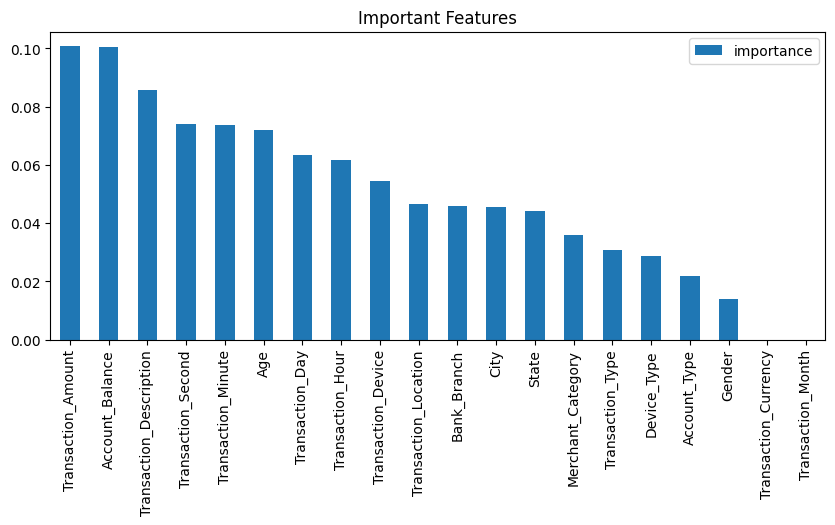

In [28]:
plt.figure(figsize=(16,8))
feature_importance.head(20).plot(kind='bar',figsize=(10,4))
plt.title('Important Features')
plt.show()

In [29]:
important_features = feature_importance[feature_importance['importance'] > 0.01].index
X = df[important_features]
print("Shape for X Dataframe: ", X.shape)
print("Columns for X Dataframe: ", X.columns)

Shape for X Dataframe:  (200000, 18)
Columns for X Dataframe:  Index(['Transaction_Amount', 'Account_Balance', 'Transaction_Description',
       'Transaction_Second', 'Transaction_Minute', 'Age', 'Transaction_Day',
       'Transaction_Hour', 'Transaction_Device', 'Transaction_Location',
       'Bank_Branch', 'City', 'State', 'Merchant_Category', 'Transaction_Type',
       'Device_Type', 'Account_Type', 'Gender'],
      dtype='object')


# Comparing various algorithms with respect to their metrics

In [30]:
models={
    'Logistic Regression':LogisticRegression(random_state=42),
    'Random Forest':RandomForestClassifier(n_estimators=100,random_state=42),
    'XG Boost': XGBClassifier(),
    'Support Vector Machine':SVC(),
     'KNN': KNeighborsClassifier(n_neighbors=3),
}


In [31]:
def evaluate_model(model, X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred,average='weighted',zero_division=0)
    recall=recall_score(y_test,y_pred,average='weighted',zero_division=0)
    f1=f1_score(y_test,y_pred,average='weighted',zero_division=0)
    return accuracy,precision,recall,f1

In [32]:
results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.948875,0.900364,0.948875,0.923983
1,Random Forest,0.948875,0.900364,0.948875,0.923983
2,XG Boost,0.948700,0.900355,0.948700,0.923896
3,Support Vector Machine,0.948875,0.900364,0.948875,0.923983
4,KNN,0.942600,0.902735,0.942600,0.921401


Model        Logistic Regression
Accuracy                0.948875
Precision               0.900364
Recall                  0.948875
F1-Score                0.923983
Name: 0, dtype: object


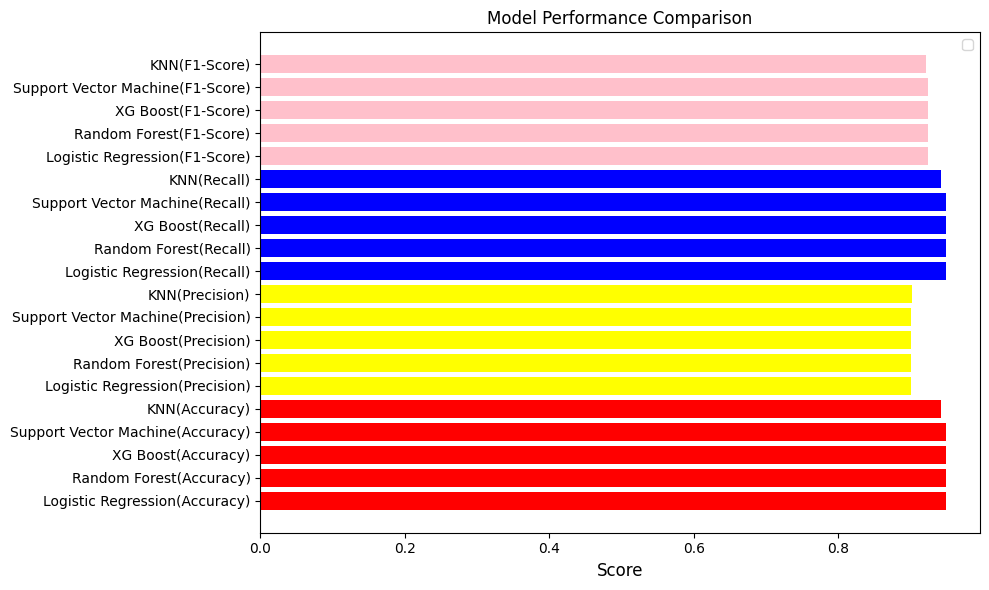

In [33]:
best_model=results_df.loc[results_df['Accuracy'].idxmax()]

print(best_model)
fig,ax=plt.subplots(figsize=(10,6))
metrics=['Accuracy','Precision','Recall','F1-Score']
colors=['red','yellow','blue','pink']
for i,metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f'({metric})',results_df[metric],color= colors[i])

ax.set_xlabel('Score',fontsize=12)
ax.set_title('Model Performance Comparison')
ax.legend()
plt.tight_layout()
plt.show()